### Feature Description and Matching

Feature matching is a key task in computer vision, used to identify corresponding features between two images. The process involves detecting keypoints, describing them with a feature descriptor, and then matching the descriptors between images. In this notebook, we explore two methods for feature detection and matching: **SIFT** (Scale-Invariant Feature Transform) and **ORB** (Oriented FAST and Rotated BRIEF).

---

### Scale-Invariant Feature Transform (SIFT)

SIFT is a feature detection and description algorithm used to detect keypoints and compute descriptors that are invariant to scale and rotation. It works by identifying keypoints (distinctive points) in the image and computing descriptors (feature vectors) around those points for matching purposes.

**Key Parameters in SIFT:**
- **Keypoints (kp)**: These are points of interest in the image where significant changes in intensity occur, such as edges or corners.
- **Descriptors (des)**: A feature vector representing the area around a keypoint. Descriptors are used to match similar features between images.

**Steps to Use SIFT:**
1. Convert the image to grayscale.
2. Detect keypoints and compute descriptors using `cv2.SIFT_create` and `detectAndCompute`.
3. Visualize the keypoints on the image using `cv2.drawKeypoints`.

---

### Brute Force Matcher (BFMatcher)

Once keypoints and descriptors are obtained from both images, the next step is to match corresponding features between the two images. **BFMatcher** is a simple brute-force matching algorithm that compares descriptors from one image to all descriptors in another image, selecting the best matches.

**Key Parameters in BFMatcher:**
- **Distance Metric**: The distance between two descriptors is calculated, and the closest match is considered the best match. The smaller the distance, the better the match.

**Steps to Use BFMatcher:**
1. Initialize the BFMatcher with `cv2.BFMatcher`.
2. Match descriptors between the two images using `bf.match`.
3. Sort the matches based on distance to show the best ones.
4. Visualize the matches using `cv2.drawMatches`.

---

### Oriented FAST and Rotated BRIEF (ORB)

**ORB** is another feature detection and description method that combines the FAST (Features from Accelerated Segment Test) detector and the BRIEF (Binary Robust Independent Elementary Features) descriptor. ORB is faster than SIFT and is often used when computational efficiency is a priority.

**Key Differences between ORB and SIFT:**
- **Speed**: ORB is faster and computationally cheaper than SIFT, making it suitable for real-time applications.
- **Descriptor Type**: ORB uses binary descriptors, while SIFT uses floating-point descriptors. This makes ORB more lightweight but sometimes less accurate than SIFT.
- **Rotation Invariance**: Like SIFT, ORB is also rotation invariant, but it may not be as accurate in certain cases.

**Exercise**: Replace SIFT with ORB for feature detection and matching. Compare the results of both methods by visualizing more than just the best 100 matches to observe how ORB performs relative to SIFT.

---

### Comparison of SIFT and ORB

- **SIFT** is more accurate, especially in challenging images with scale or rotation variations, but it is slower and more computationally expensive.
- **ORB** is faster and less computationally demanding, making it suitable for real-time applications, though it may not perform as well in certain scenarios.


# Feature Description and Matching
## Scale-invariant Feature Transform (SIFT)

Import the packages and load the image `Book.jpg`

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

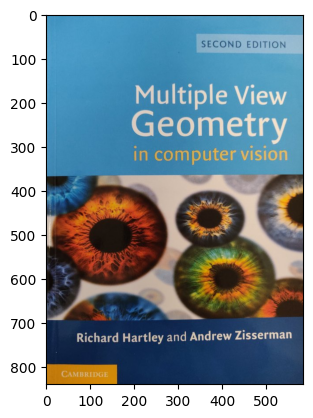

In [2]:
img = cv2.imread("Book.jpg")

b,g,r = cv2.split(img) # Changing the order from bgr to rgb so that matplotlib can show it
img = cv2.merge([r,g,b])
plt.imshow(img)

We'll start by converting the image to grayscale.

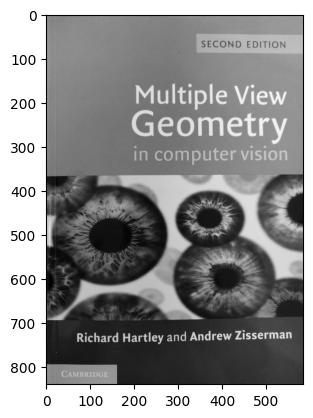

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Now we will attempt to find the features and descriptors using [SIFT](https://docs.opencv.org/4.7.0/d7/d60/classcv_1_1SIFT.html). In OpenCV we will do it by first creating a SIFT object using `cv2.SIFT_create`, and then use the class method `detectAndCompute`.

In [4]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None) #Keypoints and descriptors

To show the detected keypoints we use the function [`cv2.drawKeyPoints`](https://docs.opencv.org/4.7.0/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920). We scale the picture up by passing the argument `figsize`, so it's easier to see.

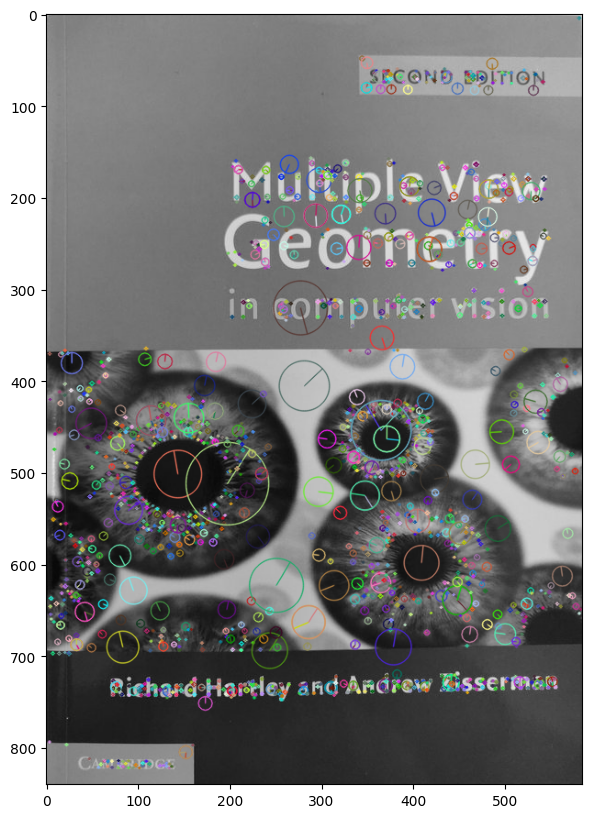

In [5]:
kp_img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

Let's load the image `More_books.jpg` and convert it to grayscale.

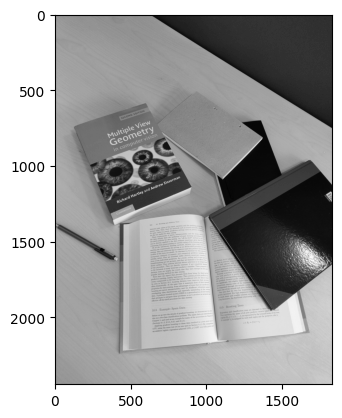

In [6]:
img2 = cv2.imread("More_books.jpg")
b,g,r = cv2.split(img2) # Changing the order from bgr to rgb so that matplotlib can show it
img2 = cv2.merge([r,g,b])

gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2, cmap = 'gray')

We use the same SIFT method again to find the keypoints and descriptors of this image.

In [7]:
kp2, des2 = sift.detectAndCompute(gray2, None)

Now that we have the descriptors of both images, let's see if we can match them and find the book from the first image in the second image.
For this example we use the **Brute Force Matcher** ([`cv2.BFMatcher`](https://docs.opencv.org/4.7.0/d3/da1/classcv_1_1BFMatcher.html)). We use the function `cv2.match` to find the matches.

In [8]:
bf = cv2.BFMatcher()
matches = bf.match(des, des2)

We use the function [`cv2.drawMatches`](https://docs.opencv.org/4.7.0/d4/d5d/group__features2d__draw.html#gad8f463ccaf0dc6f61083abd8717c261a) to display the result. We'd like to display the best of the matches. The matching is made using a distance measurement between the descriptor: The smaller the distance, the better the match. So we sort the `matches` array using the distance term and then we plot only the first 100 matches.

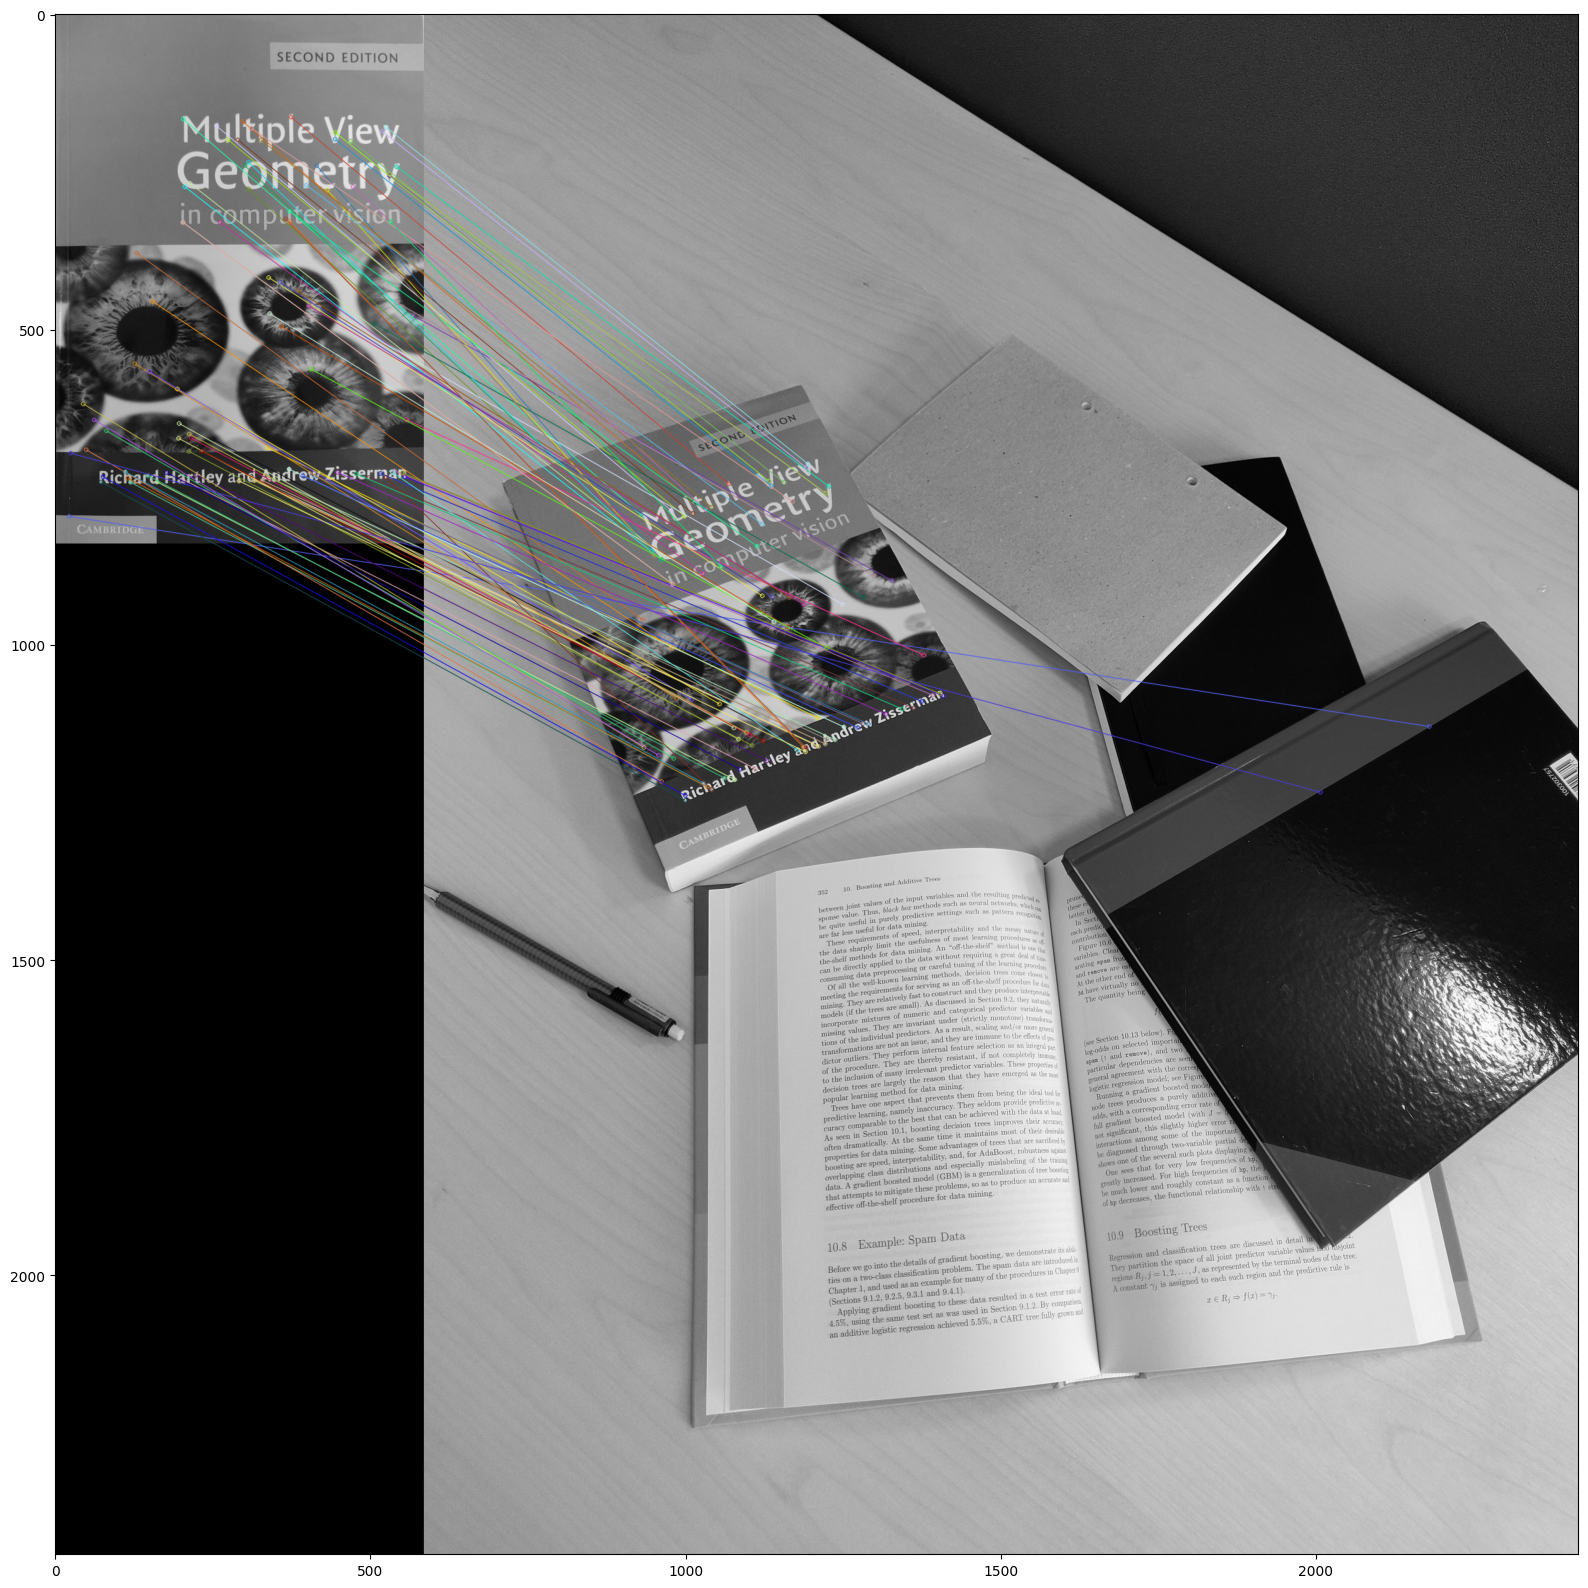

In [9]:
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(gray,kp,gray2,kp2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,20))
plt.imshow(img3)

We see that most of the matches are correct, but with some outliers.

# Exercise 3
Using the same two images, try to use Oriented BRIEF ([ORB](https://docs.opencv.org/4.7.0/db/d95/classcv_1_1ORB.html)) instead of SIFT to find the keypoints and the descriptors. Does one of these methods give a better result than the other? Try plotting more than just the best 100 matches and see if there is a difference between the two methods.

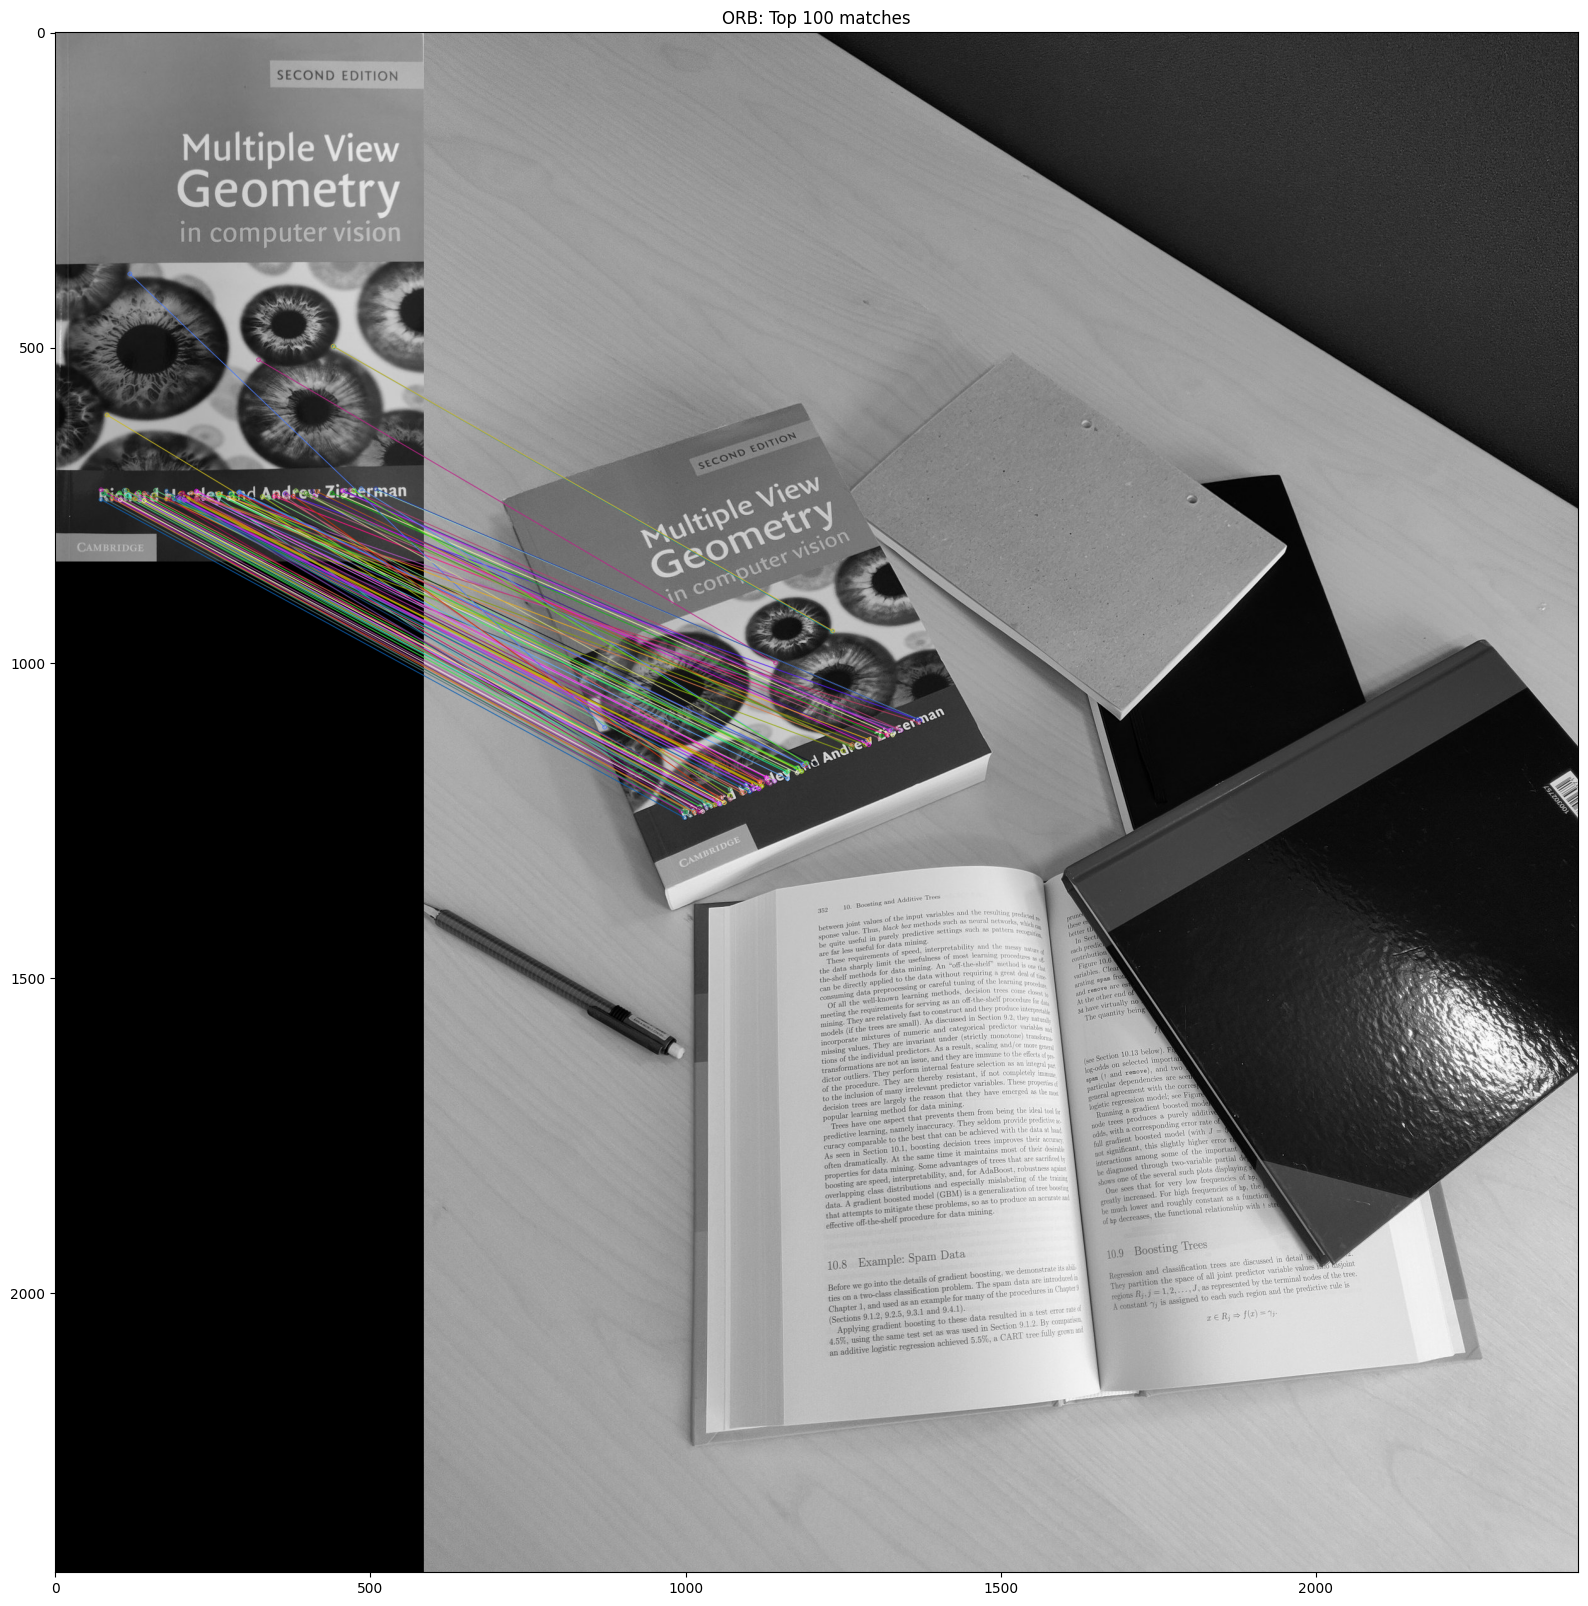

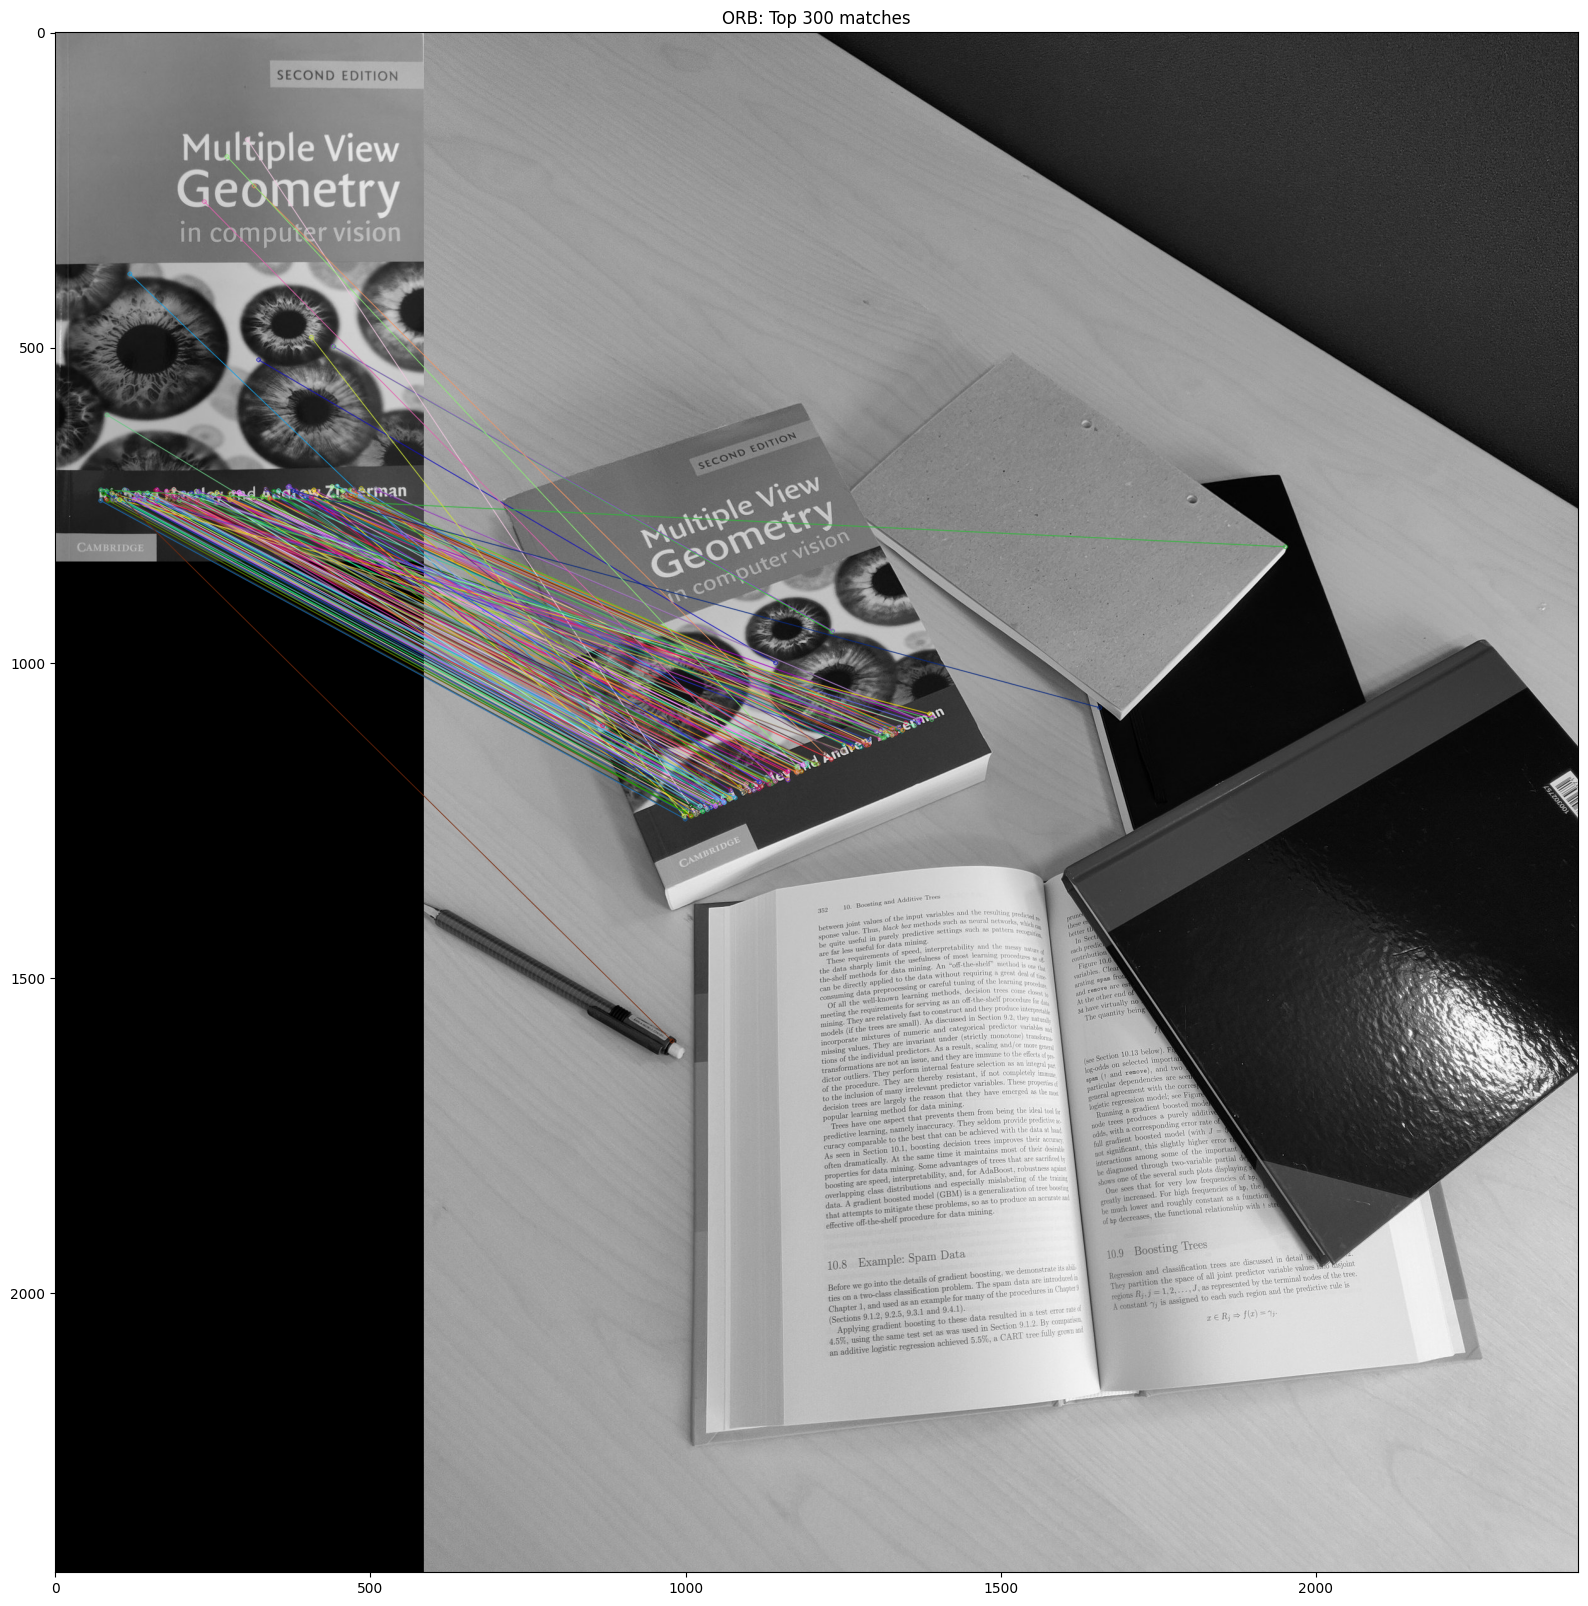

In [11]:
# Load the two images: Book and More_books
img1 = cv2.imread("Book.jpg")
img2 = cv2.imread("More_books.jpg")

# Convert them to RGB for display in Matplotlib
b1, g1, r1 = cv2.split(img1)
img1 = cv2.merge([r1, g1, b1])

b2, g2, r2 = cv2.split(img2)
img2 = cv2.merge([r2, g2, b2])

# Convert both images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# Create an ORB object
orb = cv2.ORB_create()

# Detect ORB keypoints and descriptors for both images
kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

# Use Brute Force Matcher for matching ORB descriptors
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the two images
matches_orb = bf_orb.match(des1_orb, des2_orb)

# Sort matches based on the distance (lower distance means better match)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw the matches between the two images (for ORB)
img_orb_matches = cv2.drawMatches(gray1, kp1_orb, gray2, kp2_orb, matches_orb[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the ORB matches
plt.figure(figsize=(20, 20))
plt.title('ORB: Top 100 matches')
plt.imshow(img_orb_matches)
plt.show()

# Optionally, you can plot more than 100 matches for ORB (e.g., top 300)
img_orb_matches_more = cv2.drawMatches(gray1, kp1_orb, gray2, kp2_orb, matches_orb[:300], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.title('ORB: Top 300 matches')
plt.imshow(img_orb_matches_more)
plt.show()

